<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-4-Sprint-1-NLP/blob/main/Module4/Min%20Req/Aaron_Huizenga_LS_DS_414_Topic_Modeling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Start Here

# Imports
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv to Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19 (1).csv


In [5]:
# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read CSV
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19 (1).csv")

# CHECK:
print("Columns:", df.columns.to_list())
print("---\n")
print("Shape:", df.shape)
df.head()

Columns: ['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand', 'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'reviews.date', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs']
---

Shape: (28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
# I want to drop any unecessary columns

df.drop(["id", "dateAdded", "dateUpdated", "asins", "imageURLs", 
         "reviews.didPurchase", "reviews.doRecommend", "reviews.id", 
         "reviews.numHelpful", "sourceURLs", "reviews.date", "reviews.dateSeen",
         "keys", "reviews.sourceURLs", "reviews.title"], axis = 1, inplace=True)

In [7]:
# df data types
print(df.dtypes)

# CHECK:
df.head(20)

name                  object
brand                 object
categories            object
primaryCategories     object
manufacturer          object
manufacturerNumber    object
reviews.rating         int64
reviews.text          object
reviews.username      object
dtype: object


,name,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.rating,reviews.text,reviews.username
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,3,I order 3 of them and one of the item is bad q...,Byger yang
1,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,4,Bulk is always the less expensive way to go fo...,ByMG
2,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Well they are not Duracell but for the price i...,BySharon Lambert
3,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Seem to work as well as name brand batteries a...,Bymark sexson
4,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,These batteries are very long lasting the pric...,Bylinda
5,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Bought a lot of batteries for Christmas and th...,ByPainter Marlow
6,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,ive not had any problame with these batteries ...,ByAmazon Customer
7,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Well if you are looking for cheap non-recharge...,ByLynn Pendegrass
8,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,3,These do not hold the amount of high power jui...,ByK.R.
9,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,4,AmazonBasics AA AAA batteries have done well b...,BySilverLane


In [ ]:
## Created tokens from the 'reviews.text' column

# Defining simple'tokenize' function
# def tokenize(text):
#     return [token for token in simple_preprocess(test, max_len=40) if token not in STOPWORDS]

# Sample Review
# sample = df['reviews.text'][0]
# print("Sample:\n", sample)

# TEST / CHECK:
# x = tokenize(sample)
# print(x)

In [8]:

from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_numeric, stem_text
from gensim.parsing.preprocessing import strip_multiple_whitespaces, strip_non_alphanum, remove_stopwords, strip_short

# Defining 'preprocessing_filter' function
def preprocessing_filter(text):
    '''
    Cleans text for font size, whitespace,
    removing stop words, and stripping non-alpha 
    numeric characters
    '''
    # Custom Preprocessing Filter
    custom_filters = [lambda x: x.lower(),          # Lowercase
                      strip_multiple_whitespaces,   # Remove numbers
                      remove_stopwords,             # Remove stopwords
                      strip_non_alphanum,           # Remove non-alpha numeric characters
                     ]

    # TEST / CHECK: Preprocess with 'custom_filters'
    processed_text = preprocess_string(text, custom_filters)
    
    # Returning 'processed_text'
    return processed_text

In [9]:
# Created new column for processed text and tokens via '.apply(preprocessing_filter)'
df["tokenized_reviews"] = df["reviews.text"].apply(preprocessing_filter)

# CHECK:
print(df.shape)
df.head()

(28332, 10)


,name,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.rating,reviews.text,reviews.username,tokenized_reviews
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,3,I order 3 of them and one of the item is bad q...,Byger yang,"[order, 3, item, bad, quality, missing, backup..."
1,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,4,Bulk is always the less expensive way to go fo...,ByMG,"[bulk, expensive, way, products, like]"
2,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Well they are not Duracell but for the price i...,BySharon Lambert,"[duracell, price, happy]"
3,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Seem to work as well as name brand batteries a...,Bymark sexson,"[work, brand, batteries, better, price]"
4,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,These batteries are very long lasting the pric...,Bylinda,"[batteries, long, lasting, price, great]"


In [12]:
# df.columns.to_list() for reordering
col_list = df.columns.to_list()
col_list

# Desired column order
df = df[['name',
         'brand',
         'categories',
         'primaryCategories',
         'manufacturer',
         'manufacturerNumber',
         'reviews.rating',
         'reviews.username',
         'reviews.text',
         'tokenized_reviews'
        ]]

# CHECK:
print(df.shape)
df.head()

(28332, 10)


,name,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.rating,reviews.username,reviews.text,tokenized_reviews
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,3,Byger yang,I order 3 of them and one of the item is bad q...,"[order, 3, item, bad, quality, missing, backup..."
1,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,4,ByMG,Bulk is always the less expensive way to go fo...,"[bulk, expensive, way, products, like]"
2,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,BySharon Lambert,Well they are not Duracell but for the price i...,"[duracell, price, happy]"
3,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Bymark sexson,Seem to work as well as name brand batteries a...,"[work, brand, batteries, better, price]"
4,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Bylinda,These batteries are very long lasting the pric...,"[batteries, long, lasting, price, great]"


In [14]:

from sklearn.preprocessing import OrdinalEncoder

# Defining 'data_distributions' Function
def data_distributions(df):
    
    # Predefined column 
    cols = ['brand',
            'primaryCategories',
            'manufacturer',
            'manufacturerNumber',
            'reviews.rating'
           ]
    
    # For Loop for specified columns above
    for col in cols:
        print(col + ":", df[col].nunique())
        print("\n")
        print(df[col].value_counts(normalize=True))
        print("-----\n")

# Calling the function on the dataframe
data_distributions(df)

brand: 3


Amazon          0.570133
Amazonbasics    0.429514
AmazonBasics    0.000353
Name: brand, dtype: float64
-----

primaryCategories: 9


Electronics                    0.493964
Health & Beauty                0.426055
Toys & Games,Electronics       0.059156
Office Supplies,Electronics    0.013624
Electronics,Media              0.006530
Office Supplies                0.000318
Animals & Pet Supplies         0.000212
Home & Garden                  0.000071
Electronics,Furniture          0.000071
Name: primaryCategories, dtype: float64
-----

manufacturer: 4


Amazon                     0.569321
AmazonBasics               0.429867
Amazon Digital Services    0.000635
Amazon.com                 0.000176
Name: manufacturer, dtype: float64
-----

manufacturerNumber: 65


HL-002619           0.294473
LR6G0748FFPAB-US    0.131583
53-004485           0.086228
53-004484           0.083651
53-004754           0.059156
53-004755           0.050296
53-004683           0.042778
53-004729        

## Gensim LDA

In [15]:
# 'Dictionary' Representation of all the words in our corpus
id2word = corpora.Dictionary(df["tokenized_reviews"])

# Checking the 'tokenid' for word:'price'
id2word.token2id["price"]

19

In [16]:
# Number of tokens used (before filter)
print("Number of Tokens (before filter):", len(id2word.keys()))

# Removing extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

# Number of tokens used (after filter)
print("Number of Tokens (after filter):", len(id2word.keys()))

Number of Tokens (before filter): 10366
Number of Tokens (after filter): 3917


In [17]:
# bag of words(bow) representation of our corpus
corpus = [id2word.doc2bow(text) for text in df["tokenized_reviews"]]

# CHECK:
corpus[10][:10]

[(18, 1),
 (19, 1),
 (21, 1),
 (22, 1),
 (26, 1),
 (43, 2),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1)]

In [18]:
# LDA Model
lda = LdaMulticore(corpus=corpus,       # 'corpus' = collection of written texts (tokens)
                   id2word=id2word,     # id2word = word ids
                   random_state=723812, # Reproducibility
                   num_topics=10,       # Set Number of Topics 
                   passes=10,           # Iteratively updates probabilities for the words
                   workers=12
                  )

In [19]:
# Number = Probabilistic weight of each word showing up in a given topic
lda.print_topics()

[(0,
  '0.118*"good" + 0.022*"price" + 0.020*"tablet" + 0.018*"far" + 0.014*"it" + 0.013*"kids" + 0.013*"value" + 0.011*"best" + 0.010*"works" + 0.009*"recommend"'),
 (1,
  '0.077*"batteries" + 0.025*"t" + 0.020*"long" + 0.019*"work" + 0.015*"i" + 0.014*"amazon" + 0.014*"price" + 0.013*"brand" + 0.012*"battery" + 0.012*"great"'),
 (2,
  '0.054*"it" + 0.044*"tablet" + 0.033*"loves" + 0.028*"old" + 0.027*"s" + 0.026*"year" + 0.024*"bought" + 0.015*"games" + 0.014*"son" + 0.013*"t"'),
 (3,
  '0.055*"use" + 0.051*"easy" + 0.019*"read" + 0.016*"tablet" + 0.016*"books" + 0.016*"it" + 0.015*"t" + 0.014*"s" + 0.012*"kindle" + 0.012*"great"'),
 (4,
  '0.039*"tablet" + 0.035*"kids" + 0.034*"great" + 0.019*"love" + 0.019*"amazon" + 0.016*"apps" + 0.015*"easy" + 0.013*"year" + 0.013*"use" + 0.012*"games"'),
 (5,
  '0.033*"t" + 0.022*"good" + 0.020*"tablet" + 0.019*"s" + 0.016*"it" + 0.016*"price" + 0.012*"like" + 0.010*"amazon" + 0.009*"product" + 0.009*"device"'),
 (6,
  '0.053*"great" + 0.024*"b

In [20]:
# Time to clean up the words so that the appear more presentable, according to 
# the topic basis.

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [21]:
# Seperating each word with a sapce
topics = [", ".join(t[0:10]) for t in words]

In [22]:
# This function will print out the Top 10 words from each topic

for id, t in enumerate(topics):
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
good, price, tablet, far, it, kids, value, best, works, recommend

------ Topic 1 ------
batteries, t, long, work, i, amazon, price, brand, battery, great

------ Topic 2 ------
it, tablet, loves, old, s, year, bought, games, son, t

------ Topic 3 ------
use, easy, read, tablet, books, it, t, s, kindle, great

------ Topic 4 ------
tablet, kids, great, love, amazon, apps, easy, year, use, games

------ Topic 5 ------
t, good, tablet, s, it, price, like, amazon, product, device

------ Topic 6 ------
great, buy, tablet, price, games, good, use, play, deal, gift

------ Topic 7 ------
great, price, tablet, good, battery, screen, product, quality, works, amazon

------ Topic 8 ------
kindle, it, bought, love, loves, old, daughter, new, got, christmas

------ Topic 9 ------
tablet, love, kids, tablets, use, t, apps, amazon, like, purchased



## DA and Visualization (DA = Data Analysis)

In [26]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.6MB/s 
     |████████████████████████████████| 552kB 8.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=64c2641153f08d8ed6385ee237a9ccf8ec6f219dbdeab533961e26014d7d9941
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=091fe8973ba66c6fed1dbaea4a1e2ae5567f0fcdb3775f22e0412a8202135525
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [27]:
import pyLDAvis.gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.ldamulticore import LdaMulticore

pyLDAvis.enable_notebook()

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.199788  0.135054       1        1  24.551775
7     -0.058643 -0.118557       2        1  10.884993
3      0.016419 -0.001073       3        1  10.667192
4      0.078672 -0.046132       4        1  10.221533
2      0.121703  0.062824       5        1   9.688907
8      0.164158  0.074963       6        1   8.884771
5     -0.066352  0.003031       7        1   7.563483
9      0.011743  0.064136       8        1   6.567143
0     -0.111206 -0.069363       9        1   5.611138
6      0.043294 -0.104884      10        1   5.359062, topic_info=                Term         Freq        Total Category  logprob  loglift
19         batteries  7029.000000  7029.000000  Default  30.0000  30.0000
36              good  5134.000000  5134.000000  Default  29.0000  29.0000
22             great  8579.000000  8579.000000  Default  28.0000  28.0000
2307          kindle  2948.000000  2948.000000  Default  27.0000  27.0000
869             easy  3262.000000  3262.000000  Default  26.0000  26.0000
2074           loves  2189.000000  2189.000000  Default  25.0000  25.0000
199               it  6011.000000  6011.000000  Default  24.0000  24.0000
2694          tablet  7425.000000  7425.000000  Default  23.0000  23.0000
18             price  4501.000000  4501.000000  Default  22.0000  22.0000
108              use  4706.000000  4706.000000  Default  21.0000  21.0000
215             kids  2621.000000  2621.000000  Default  20.0000  20.0000
604              old  2209.000000  2209.000000  Default  19.0000  19.0000
119             year  1828.000000  1828.000000  Default  18.0000  18.0000
30            bought  3188.000000  3188.000000  Default  17.0000  17.0000
102             love  3467.000000  3467.000000  Default  16.0000  16.0000
43                 t  4934.000000  4934.000000  Default  15.0000  15.0000
753            games  1855.000000  1855.000000  Default  14.0000  14.0000
31               buy  2131.000000  2131.000000  Default  13.0000  13.0000
21             brand  1189.000000  1189.000000  Default  12.0000  12.0000
1009            gift  1101.000000  1101.000000  Default  11.0000  11.0000
901             read  1346.000000  1346.000000  Default  10.0000  10.0000
1740            apps  1994.000000  1994.000000  Default   9.0000   9.0000
104                s  3652.000000  3652.000000  Default   8.0000   8.0000
8            quality  1235.000000  1235.000000  Default   7.0000   7.0000
218              far  1179.000000  1179.000000  Default   6.0000   6.0000
1434        daughter   963.000000   963.000000  Default   5.0000   5.0000
453            value   846.000000   846.000000  Default   4.0000   4.0000
481             play  1212.000000  1212.000000  Default   3.0000   3.0000
183          product  1806.000000  1806.000000  Default   2.0000   2.0000
3            battery  1982.000000  1982.000000  Default   1.0000   1.0000
2179            darn    64.128532    64.985031   Topic1  -7.2147   1.3911
54         energizer   292.888031   297.190765   Topic1  -5.6958   1.3898
61               aaa   339.324799   345.162567   Topic1  -5.5486   1.3873
133          candles    95.252640    96.976456   Topic1  -6.8191   1.3865
661          wrapped    85.296799    86.994865   Topic1  -6.9294   1.3847
339        cardboard    75.220642    76.756271   Topic1  -7.0552   1.3842
172               48    87.701347    89.603569   Topic1  -6.9016   1.3829
60                aa   436.822754   446.853210   Topic1  -5.2961   1.3817
27      amazonbasics   273.332336   279.728851   Topic1  -5.7649   1.3813
633      flashlights   110.473106   113.101616   Topic1  -6.6708   1.3809
281            packs    89.219223    91.362625   Topic1  -6.8845   1.3806
484          remotes   202.110336   207.090805   Topic1  -6.0668   1.3800
511           costco    77.147102    79.073608   Topic1  -7.0299   1.3797
16          duracell   552.096069   566.195679   Topi

In [29]:
dist = [lda[d] for d in corpus]

# Fill-in missing values from distribution as 0
def update(text):
    d_dist = {k:0 for k in range(0,10)}
    for t in text:
        d_dist[t[0]] = t[1]
    return d_dist

new_dist = [update(d) for d in dist]

In [30]:
# Adding the distribution to the dataframe via Top 10 words as a proxy for the topic 
categories = [i for i in df["primaryCategories"]]

df_new = pd.DataFrame.from_records(new_dist, index=categories)
df_new.columns = topics
df_new["categories"] = categories

df_new.head()

,"good, price, tablet, far, it, kids, value, best, works, recommend","batteries, t, long, work, i, amazon, price, brand, battery, great","it, tablet, loves, old, s, year, bought, games, son, t","use, easy, read, tablet, books, it, t, s, kindle, great","tablet, kids, great, love, amazon, apps, easy, year, use, games","t, good, tablet, s, it, price, like, amazon, product, device","great, buy, tablet, price, games, good, use, play, deal, gift","great, price, tablet, good, battery, screen, product, quality, works, amazon","kindle, it, bought, love, loves, old, daughter, new, got, christmas","tablet, love, kids, tablets, use, t, apps, amazon, like, purchased",categories
Health & Beauty,0.000000,0.924979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Health & Beauty
Health & Beauty,0.016668,0.849979,0.016668,0.016669,0.016669,0.016671,0.016669,0.016668,0.016668,0.016671,Health & Beauty
Health & Beauty,0.025009,0.774947,0.025006,0.025004,0.025003,0.025004,0.025006,0.025009,0.025008,0.025005,Health & Beauty
Health & Beauty,0.016669,0.849983,0.016667,0.016667,0.016667,0.016669,0.016669,0.016672,0.016668,0.016667,Health & Beauty
Health & Beauty,0.016669,0.649886,0.016667,0.016667,0.016668,0.016668,0.016670,0.216769,0.016667,0.016667,Health & Beauty


In [31]:
df_new.groupby("categories").mean()

,"good, price, tablet, far, it, kids, value, best, works, recommend","batteries, t, long, work, i, amazon, price, brand, battery, great","it, tablet, loves, old, s, year, bought, games, son, t","use, easy, read, tablet, books, it, t, s, kindle, great","tablet, kids, great, love, amazon, apps, easy, year, use, games","t, good, tablet, s, it, price, like, amazon, product, device","great, buy, tablet, price, games, good, use, play, deal, gift","great, price, tablet, good, battery, screen, product, quality, works, amazon","kindle, it, bought, love, loves, old, daughter, new, got, christmas","tablet, love, kids, tablets, use, t, apps, amazon, like, purchased"
categories,,,,,,,,,,
Animals & Pet Supplies,0.054894,0.168046,0.038886,0.197667,0.007779,0.152440,0.066263,0.122723,0.007779,0.159073
Electronics,0.060537,0.028096,0.132475,0.126050,0.123640,0.070554,0.078494,0.145579,0.144456,0.066015
"Electronics,Furniture",0.000000,0.000000,0.000000,0.000000,0.280550,0.000000,0.000000,0.220089,0.000000,0.453240
"Electronics,Media",0.065185,0.034711,0.021697,0.331299,0.041471,0.151906,0.018700,0.089936,0.199446,0.023341
Health & Beauty,0.117133,0.487616,0.026315,0.027629,0.027032,0.036217,0.067738,0.137031,0.025723,0.034360
Home & Garden,0.128270,0.031252,0.031252,0.281238,0.031252,0.031251,0.031251,0.031253,0.031252,0.371731
Office Supplies,0.195033,0.021157,0.021157,0.021159,0.078278,0.169298,0.021162,0.234124,0.021157,0.217475
"Office Supplies,Electronics",0.073201,0.029906,0.044737,0.267873,0.058995,0.088800,0.066481,0.108480,0.199938,0.037386
"Toys & Games,Electronics",0.049031,0.022151,0.253518,0.049205,0.243995,0.047395,0.079951,0.046107,0.099112,0.083129


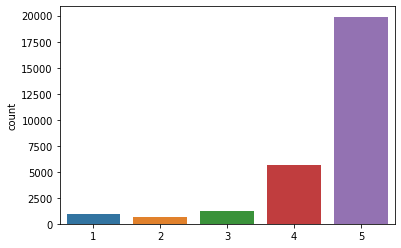

In [35]:
import seaborn as sns

ratings = df["reviews.rating"].to_list()

sns.countplot(ratings);

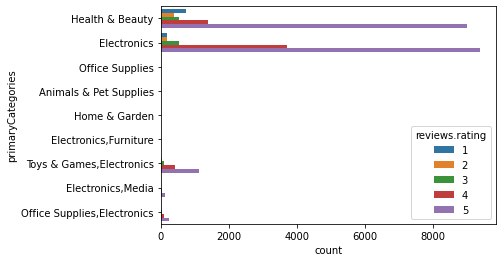

In [36]:
sns.countplot(y="primaryCategories", hue="reviews.rating", data=df);

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling